In [1]:
from escape import *
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.colors as colors
%matplotlib notebook

In [2]:
# parameters for planet 
pars = AttributeDict({
        'R':0.3767*rjup, # Radius of Planet [cm]
        'M':0.0727*mjup, # Mass of Planet [g]
        'a':0.0386*AU, # Semi-major Axis [AU]
        'm1':1*mp, # Mass of Constituent 1 [g]
        'starspec':'hlsp_muscles_multi_multi_gj436_broadband_v22_const-res-sed.fits',
        'b1':lambda T:  1.04*10**18 * T**0.732, # binary diffusion coefficient [1/cm/s]
        'X1':0.9, # Fraction of Constituent 1 
        'T':600, # Temperature of Planet [K]
        'distance':10.14 # Distance to planet [parsec]
         })

In [3]:
# load spectra
spec = fits.getdata(pars.starspec,1)
mask = spec['WAVELENGTH'] < 912 # EUV wavelength
Feuv = spec['FLUX'][mask] * (pars.distance*pc)**2/pars.a**2  # * spec['WAVELENGTH'][mask] * 1e-8 / (h*c)
pars.Feuv = trapz(Feuv,spec['WAVELENGTH'][mask])
pars.FLUX = spec['FLUX'][mask]
pars.WAVELENGTH = spec['WAVELENGTH'][mask]

<IPython.core.display.Javascript object>


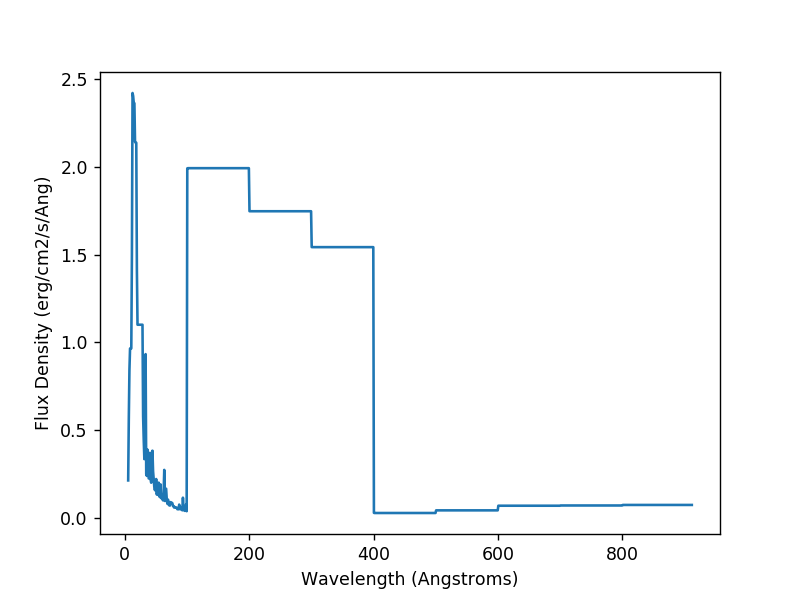

In [4]:
f,axs = plt.subplots(1)
axs.plot(spec['WAVELENGTH'][mask],Feuv)
axs.set_xlabel('Wavelength (Angstroms)')
axs.set_ylabel('Flux Density (erg/cm2/s/Ang)')
plt.show()

<IPython.core.display.Javascript object>


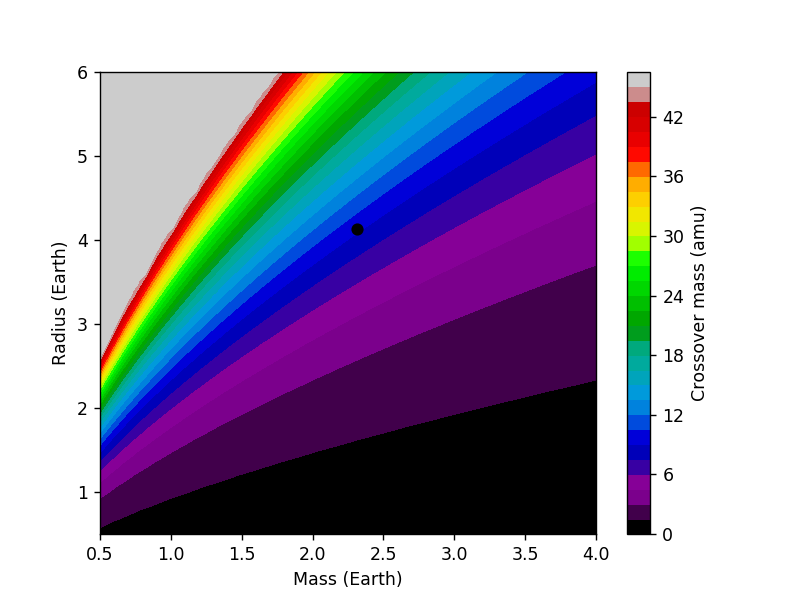

In [5]:
# create 2D grid
M = np.linspace( 0.5, 4, 90)*mearth
R = np.linspace( 0.5, 6, 40)*rearth
mg, rg = np.meshgrid(M,R)


@interact(X1=widgets.FloatSlider(min=0,max=1,step=0.025,value=0.9), 
          T=widgets.IntSlider(min=300,max=1000,step=50,value=500))
def g(X1=0.9, T=500):
    
    cgrid = crossover(pars.Feuv,
                        rg, mg,
                        T,
                        pars.m1,
                        pars.b1(T),
                        X1)

    AMU_LIMIT = 45
    mask = (cgrid/mp) > AMU_LIMIT
    cgrid[mask] = (AMU_LIMIT+1)*mp
    plt.close()
    f,axg = plt.subplots(1)
    cp = axg.contourf( M/mearth, R/rearth, (cgrid/mp), 40,cmap='nipy_spectral',vmin=1,vmax=AMU_LIMIT )
    
    axg.plot( pars.M/mearth, pars.R/rearth, 'ko',label='GJ 436 b')
    
    axg.set_ylabel('Radius (Earth)')
    axg.set_xlabel("Mass (Earth)")
    cbar = f.colorbar(cp, ax=axg, extend='both')
    cbar.ax.set_ylabel("Crossover mass (amu)")
    plt.show() 